In [2]:
from multiinstance.em import generateBags
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import chainer
from easydict import EasyDict

In [4]:
import scipy.stats as ss

In [5]:
f1 = ss.norm(loc=0,scale=1)
f0 = ss.norm(loc=-2,scale=1)
alpha = .5

posterior = lambda x: alpha * f1.pdf(x) / (alpha * f1.pdf(x) + (1 - alpha) * f0.pdf(x))

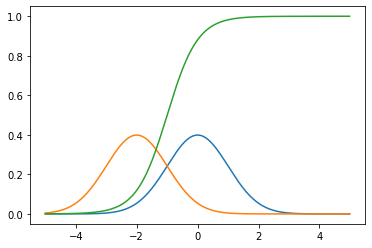

In [6]:
rng = np.arange(-5,5,.01)
plt.plot(rng,f1.pdf(rng))
plt.plot(rng,f0.pdf(rng))
plt.plot(rng,posterior(rng))

In [ ]:
def getData(NPos=100,NUnlabeled=1000):
    alpha = np.random.beta(2,2)
    bag = EasyDict()
    bag.positive = f1.rvs(NPos)
    n1U = int(NUnlabeled * alpha)
    n0U = int(NUnlabeled *(1-alpha)))
    bag.unlabeled = np.concatenate((f1.rvs(n1U),
                                    f0.rvs(n0U))
    bag.labels = np.concatenate((np.ones(n1U), np.zeros(n0U)))